In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

from MultiscaleEMD import MSAnnData
from scse import MeanEmbedding

import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import scse

In [2]:
adata = sc.datasets.pbmc3k_processed()

In [3]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

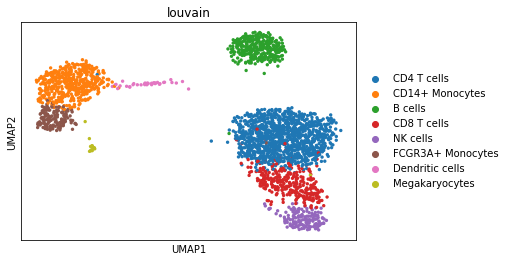

In [4]:
sc.pl.umap(adata, color="louvain")

In [5]:
me = MeanEmbedding(sample_key="louvain")

In [6]:
sample_adata = me.fit_transform(adata)

In [23]:
te = scse.TreeEmbedding(sample_key="louvain", n_clusters=2, n_levels=3)

In [24]:
te

TreeEmbedding(sample_key='louvain')

In [25]:
t_adata = te.fit_transform(adata)

(8, 5) (5,)


In [35]:
te.mt.counts_mtx.toarray().shape

(8, 5)

In [34]:
te.mt.counts_mtx.toarray()

array([[1144,    1, 1143, 1142,    2],
       [ 480,    0,  480,    0,  479],
       [ 342,    0,  342,  342,    0],
       [ 316,    0,  316,  316,    0],
       [ 154,    0,  154,  154,    0],
       [ 150,    0,  150,   13,  137],
       [  37,    0,   37,   20,   17],
       [  15,    0,   15,    3,   12]], dtype=int32)

In [41]:
te.mt.edge_weights

array([ 0.        , 34.11219406,  0.31769517,  2.945925  ,  9.40061474])

In [42]:
sums = te.mt.counts_mtx.toarray()[:, 0]

[autoreload of scse.core failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/jovyan/work/scse/scse/core.py", line 61
    X = 
        ^
SyntaxEr

In [39]:
import pprint

te.mt.counts_mtx.multiply(te.mt.edge_weights).toarray().round(2)

array([[   0.  ,   34.11,  363.13, 3364.25,   18.8 ],
       [   0.  ,    0.  ,  152.49,    0.  , 4502.89],
       [   0.  ,    0.  ,  108.65, 1007.51,    0.  ],
       [   0.  ,    0.  ,  100.39,  930.91,    0.  ],
       [   0.  ,    0.  ,   48.93,  453.67,    0.  ],
       [   0.  ,    0.  ,   47.65,   38.3 , 1287.88],
       [   0.  ,    0.  ,   11.75,   58.92,  159.81],
       [   0.  ,    0.  ,    4.77,    8.84,  112.81]])

In [46]:
counts = te.mt.counts_mtx.toarray()

In [47]:
scounts = counts[:, 0]

In [48]:
edge_weights = te.mt.edge_weights

In [55]:
(counts / scounts[:, None]).round(2)

array([[1.  , 0.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 1.  , 1.  , 0.  ],
       [1.  , 0.  , 1.  , 0.09, 0.91],
       [1.  , 0.  , 1.  , 0.54, 0.46],
       [1.  , 0.  , 1.  , 0.2 , 0.8 ]])

In [54]:
(counts * edge_weights / scounts[:, None]).round(2)

array([[0.  , 0.03, 0.32, 2.94, 0.02],
       [0.  , 0.  , 0.32, 0.  , 9.38],
       [0.  , 0.  , 0.32, 2.95, 0.  ],
       [0.  , 0.  , 0.32, 2.95, 0.  ],
       [0.  , 0.  , 0.32, 2.95, 0.  ],
       [0.  , 0.  , 0.32, 0.26, 8.59],
       [0.  , 0.  , 0.32, 1.59, 4.32],
       [0.  , 0.  , 0.32, 0.59, 7.52]])

In [22]:
sample_adata

AnnData object with n_obs × n_vars = 8 × 1838